## 一、数据分析和处理

In [28]:
import pandas as pd 
from sklearn.model_selection import train_test_split

df = pd.read_csv('data.csv',encoding = 'gbk')

"""
数据处理
"""

###删除无关特征###
df.drop(['Unnamed: 0','custid','trade_no','bank_card_no' ,'source','id_name'],inplace =True,axis = 1)

###数据类型转换###（主要针对 obeject（文字类） 
df['reg_preference_for_trad'].fillna('其他城市',inplace = True)
df['reg_preference_for_trad'].replace({'一线城市':1,'二线城市':2,'三线城市':3,'境外':4,'其他城市':5},inplace = True)

# 处理日期格式 'latest_query_time', 'loans_latest_time'(暂时去掉？？？)

df.drop(['latest_query_time', 'loans_latest_time'],inplace =True,axis = 1)


###缺失值处理###
df['student_feature'].fillna(0,inplace=True) 
for i in df.columns:
    df[i].fillna(df[i].mode()[0],inplace = True)  #加[0]是因为众数可能有多个，返回不是一个数字
    
###切分数据集###

y=df['status']
x=df.drop('status',axis=1)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state = 2018)   
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(y_test.value_counts())

(3327, 81) (1427, 81) (3327,) (1427,)
0    1068
1     359
Name: status, dtype: int64


## 二、特征选择

## 三、建模

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import Perceptron
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from pandas import DataFrame,Series

### 标准化处理 ### 必须要做的
features = x_train.columns #目前是83个特征
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## 模型

### 1.基本的分类器 ###

In [30]:
#感知机
clf_pt = Perceptron(max_iter=50)
clf_pt.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=50, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [31]:
#逻辑回归
clf_lr = LogisticRegression()
clf_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
#svm
clf_svm = SVC(gamma='auto',probability=True)
clf_svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
#决策树
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
# 高斯朴素贝叶斯
clf_gnb = GaussianNB()
clf_gnb.fit(x_train, y_train)

GaussianNB(priors=None)

### 2.基于sklearn的集成学习 ###

In [35]:
#随机森林
clf_rf = RandomForestClassifier(random_state=2018, n_jobs=-1)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [36]:
# GBDT
clf_gbdt = GradientBoostingClassifier()
clf_gbdt.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [37]:
#Bagging 这个耗时长
clf_bg = BaggingClassifier(base_estimator=SVC(gamma='auto',probability=True), n_estimators=60, max_samples=1.0, max_features=1.0, random_state=2018,
                        n_jobs=1, verbose=1)
clf_bg.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=60, n_jobs=1, oob_score=False,
         random_state=2018, verbose=1, warm_start=False)

In [38]:
 #Adaboost 这个耗时最长
clf_ab = AdaBoostClassifier(base_estimator=SVC(gamma='auto',probability=True), n_estimators=50,algorithm='SAMME')
clf_ab.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

### 3.大杀器 ###

In [39]:
#xgb
clf_xgb = xgb.XGBClassifier(max_depth=6, num_class =2,learning_rate=0.1, n_estimators=100, silent=True, objective='multi:softmax',
                        nthread=32, gamma=0.1, min_child_weight=3, max_delta_step=0, subsample=1, colsample_bytree=1,
                        colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=1000,
                        missing=None)
clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=32, num_class=2, objective='multi:softmax',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=1000, silent=True, subsample=1)

In [40]:
# lgbm
clf_lgbm = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=250,
                              max_bin=255, subsample_for_bin=200000, objective=None, min_split_gain=0.0, min_child_weight=0.001,
                              min_child_samples=20, subsample=1.0, subsample_freq=1, colsample_bytree=1.0, reg_alpha=0.0,
                              reg_lambda=0.5, random_state=None, n_jobs=-1, silent=True)
clf_lgbm.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_bin=255,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=250, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.5,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=1)

In [41]:
# 11个模型：
##感知机,逻辑回归,svm,决策树,高斯朴素贝叶斯，随机森林，GBDT，Bagging ，Adaboost，xgb，lgbm

#对train
y_train_pt = clf_pt.predict(x_train)
y_train_lr = clf_lr.predict(x_train)
y_train_svm = clf_svm.predict(x_train)
y_train_dt = clf_dt.predict(x_train)
y_train_gnb = clf_gnb.predict(x_train)

y_train_rf = clf_rf.predict(x_train)
y_train_gbdt = clf_gbdt.predict(x_train)
y_train_bg = clf_bg.predict(x_train)
y_train_ab = clf_ab.predict(x_train)

y_train_xgb = clf_xgb.predict(x_train)
y_train_lgbm = clf_lgbm.predict(x_train)

#对test
y_test_pt = clf_pt.predict(x_test)
y_test_lr = clf_lr.predict(x_test)
y_test_svm = clf_svm.predict(x_test)
y_test_dt = clf_dt.predict(x_test)
y_test_gnb = clf_gnb.predict(x_test)

y_test_rf = clf_rf.predict(x_test)
y_test_gbdt = clf_gbdt.predict(x_test)
y_test_bg = clf_bg.predict(x_test)
y_test_ab = clf_ab.predict(x_test)

y_test_xgb = clf_xgb.predict(x_test)
y_test_lgbm = clf_lgbm.predict(x_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s finished


In [43]:
#概率值
#对train
# y_train_pro_pt = clf_pt.predict_proba(x_train) # Perceptron没有predict_proba
y_train_pro_lr = clf_lr.predict_proba(x_train)
y_train_pro_svm = clf_svm.predict_proba(x_train)
y_train_pro_dt = clf_dt.predict_proba(x_train)
y_train_pro_gnb = clf_gnb.predict_proba(x_train)

y_train_pro_rf = clf_rf.predict_proba(x_train)
y_train_pro_gbdt = clf_gbdt.predict_proba(x_train)
y_train_pro_bg = clf_bg.predict_proba(x_train)
y_train_pro_ab = clf_ab.predict_proba(x_train)

y_train_pro_xgb = clf_xgb.predict_proba(x_train)
y_train_pro_lgbm = clf_lgbm.predict_proba(x_train)

#对test
# y_test_pro_pt = clf_pt.predict_proba(x_test)
y_test_pro_lr = clf_lr.predict_proba(x_test)
y_test_pro_svm = clf_svm.predict_proba(x_test)
y_test_pro_dt = clf_dt.predict_proba(x_test)
y_test_pro_gnb = clf_gnb.predict_proba(x_test)

y_test_pro_rf = clf_rf.predict_proba(x_test)
y_test_pro_gbdt = clf_gbdt.predict_proba(x_test)
y_test_pro_bg = clf_bg.predict_proba(x_test)
y_test_pro_ab = clf_ab.predict_proba(x_test)

y_test_pro_xgb = clf_xgb.predict_proba(x_test)
y_test_pro_lgbm = clf_lgbm.predict_proba(x_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s finished


## 四、模型评估

In [59]:
# 混淆矩阵
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score

def get_eval(y_train,y_test,y_train_pred,y_test_pred,model_name):
    train_dataList = []
    test_dataList = []
    print('for model {}:'.format(str(model_name)))
    train_dataList.append(str(model_name))
    test_dataList.append(str(model_name))
    train_dataList.append(str('train'))
    test_dataList.append(str('test'))

#   混淆矩阵
    obj1 = confusion_matrix(y_train, y_train_pred)
    print('train_confusion_matrix\n', obj1)
    obj2 = confusion_matrix(y_test, y_test_pred)
    print('test_confusion_matrix\n', obj2)  
    ans = classification_report(y_train,y_train_pred,digits=5)
    print('综合评价:\n',ans)
#     print('accuracy:\n')
#     print('train:{}\n test:{}\n'.format(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred)))
    train_dataList.append(accuracy_score(y_train,y_train_pred))
    test_dataList.append(accuracy_score(y_test,y_test_pred))
#     print('precision:\n')
#     print('train:{}\n test:{}\n'.format(precision_score(y_train,y_train_pred),precision_score(y_test,y_test_pred)))
    train_dataList.append(precision_score(y_train,y_train_pred))
    test_dataList.append(precision_score(y_test,y_test_pred))
#     print('recall:\n')
#     print('train:{}\n test:{}\n'.format(recall_score(y_train,y_train_pred),recall_score(y_test,y_test_pred)))
    train_dataList.append(recall_score(y_train,y_train_pred))
    test_dataList.append(recall_score(y_test,y_test_pred))
#     print('f1-score:\n')
#     print('train:{}\n test:{}\n'.format(f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred)))
    train_dataList.append(f1_score(y_train,y_train_pred))
    test_dataList.append(f1_score(y_test,y_test_pred))
#     print('AUC:\n')
#     print('train:{}\n test:{}\n'.format(roc_auc_score(y_train,y_train_pred),roc_auc_score(y_test,y_test_pred)))
    train_dataList.append(roc_auc_score(y_train,y_train_pred))
    test_dataList.append(roc_auc_score(y_test,y_test_pred))
    return train_dataList,test_dataList

In [60]:
all_dataList = []
index = []
a1,a2 = get_eval(y_train,y_test,y_train_pt,y_test_pt,'感知机')
b1,b2 = get_eval(y_train,y_test,y_train_lr,y_test_lr,'逻辑回归')
c1,c2 = get_eval(y_train,y_test,y_train_svm,y_test_svm,'SVM')
d1,d2 = get_eval(y_train,y_test,y_train_dt,y_test_dt,'决策树')
e1,e2 = get_eval(y_train,y_test,y_train_gnb,y_test_gnb,'高斯朴素贝叶斯')
f1,f2 = get_eval(y_train,y_test,y_train_rf,y_test_rf,'随机森林')
g1,g2 = get_eval(y_train,y_test,y_train_gbdt,y_test_gbdt,'GBDT')
h1,h2 = get_eval(y_train,y_test,y_train_bg,y_test_bg,'Bagging')
i1,i2 = get_eval(y_train,y_test,y_train_ab,y_test_ab,'AdaBoosting')
j1,j2 = get_eval(y_train,y_test,y_train_xgb,y_test_xgb,'XGBoosting')
k1,k2 = get_eval(y_train,y_test,y_train_lgbm,y_test_lgbm,'lightGBM')
all_dataList = [a1,a2,b1,b2,c1,c2,d1,d2,e1,e2,f1,f2,g1,g2,h1,h2,i1,i2,j1,j2,k1,k2]
# all_dataList = [a1,a2,b1,b2,c1,c2,d1,d2,e1,e2,f1,f2,g1,g2,j1,j2,k1,k2]
df_all = pd.DataFrame(all_dataList,columns=['model_name','dataset','accuracy','precision','recall','f1_score','AUC'])

for model 感知机:
train_confusion_matrix
 [[2131  362]
 [ 472  362]]
test_confusion_matrix
 [[874 194]
 [212 147]]
综合评价:
              precision    recall  f1-score   support

          0    0.81867   0.85479   0.83634      2493
          1    0.50000   0.43405   0.46470       834

avg / total    0.73879   0.74932   0.74318      3327

for model 逻辑回归:
train_confusion_matrix
 [[2361  132]
 [ 519  315]]
test_confusion_matrix
 [[998  70]
 [234 125]]
综合评价:
              precision    recall  f1-score   support

          0    0.81979   0.94705   0.87884      2493
          1    0.70470   0.37770   0.49180       834

avg / total    0.79094   0.80433   0.78182      3327

for model SVM:
train_confusion_matrix
 [[2460   33]
 [ 495  339]]
test_confusion_matrix
 [[1028   40]
 [ 275   84]]
综合评价:
              precision    recall  f1-score   support

          0    0.83249   0.98676   0.90308      2493
          1    0.91129   0.40647   0.56219       834

avg / total    0.85224   0.84130   0.81763     

D:\MyCodeEnvironment\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\MyCodeEnvironment\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\MyCodeEnvironment\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
# 同时看train和test可以知道有没有过拟合
df_all

,model_name,dataset,accuracy,precision,recall,f1_score,AUC
0,感知机,train,0.749324,0.500000,0.434053,0.464698,0.644423
1,感知机,test,0.715487,0.431085,0.409471,0.420000,0.613911
2,逻辑回归,train,0.804328,0.704698,0.377698,0.491803,0.662375
3,逻辑回归,test,0.786966,0.641026,0.348189,0.451264,0.641323
4,SVM,train,0.841298,0.911290,0.406475,0.562189,0.696619
5,SVM,test,0.779257,0.677419,0.233983,0.347826,0.598265
6,决策树,train,1.000000,1.000000,1.000000,1.000000,1.000000
7,决策树,test,0.672740,0.374419,0.448468,0.408112,0.598298
8,高斯朴素贝叶斯,train,0.612864,0.368786,0.764988,0.497660,0.663481
9,高斯朴素贝叶斯,test,0.733707,0.450237,0.264624,0.333333,0.578005


In [50]:
# 画ROC曲线
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

def draw_roc(y_true, y_pred,label=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([-0.05,1.05,-0.05,1.05])
    plt.xlabel('False Postivie Rate')
    plt.ylabel('True Positive Rate')

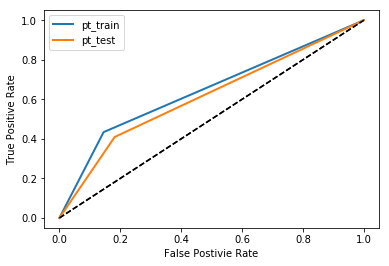

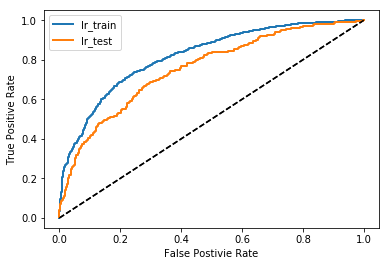

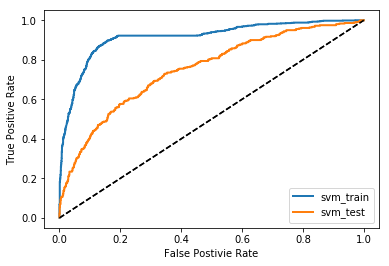

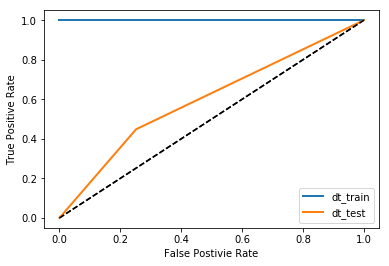

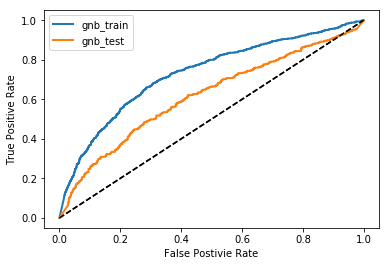

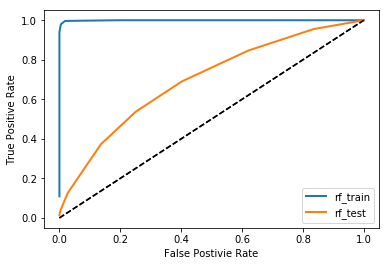

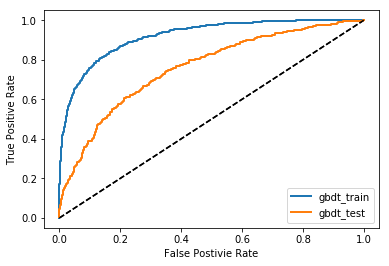

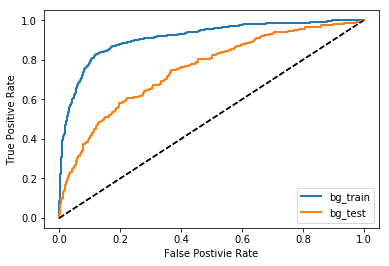

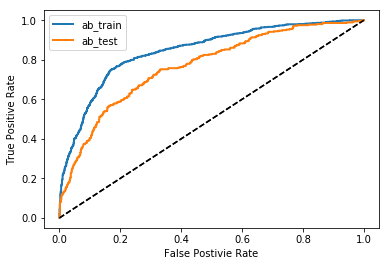

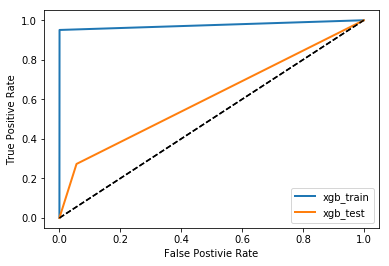

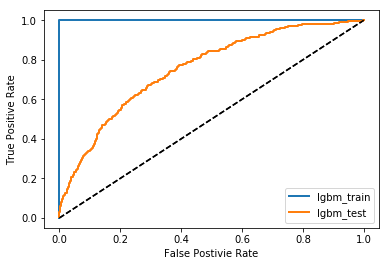

In [51]:
from sklearn.preprocessing import label_binarize

#感知机没有 概率 
draw_roc(y_train,y_train_pt,'pt_train')
draw_roc(y_test,y_test_pt,'pt_test')
plt.legend()
plt.show()


draw_roc(y_train,y_train_pro_lr[:,1],'lr_train')
draw_roc(y_test,y_test_pro_lr[:,1],'lr_test')
plt.legend()
plt.show()

draw_roc(y_train,y_train_pro_svm[:,1],'svm_train')
draw_roc(y_test,y_test_pro_svm[:,1],'svm_test')
plt.legend()
plt.show()

draw_roc(y_train,y_train_pro_dt[:,1],'dt_train')
draw_roc(y_test,y_test_pro_dt[:,1],'dt_test')
plt.legend()
plt.show()

draw_roc(y_train,y_train_pro_gnb[:,1],'gnb_train')
draw_roc(y_test,y_test_pro_gnb[:,1],'gnb_test')
plt.legend()
plt.show()

draw_roc(y_train,y_train_pro_rf[:,1],'rf_train')
draw_roc(y_test,y_test_pro_rf[:,1],'rf_test')
plt.legend()
plt.show()

draw_roc(y_train,y_train_pro_gbdt[:,1],'gbdt_train')
draw_roc(y_test,y_test_pro_gbdt[:,1],'gbdt_test')
plt.legend()
plt.show()

draw_roc(y_train,y_train_pro_bg[:,1],'bg_train')
draw_roc(y_test,y_test_pro_bg[:,1],'bg_test')
plt.legend()
plt.show()

draw_roc(y_train,y_train_pro_ab[:,1],'ab_train')
draw_roc(y_test,y_test_pro_ab[:,1],'ab_test')
plt.legend()
plt.show()

draw_roc(y_train,y_train_pro_xgb[:,1],'xgb_train')
draw_roc(y_test,y_test_pro_xgb[:,1],'xgb_test')
plt.legend()
plt.show()

draw_roc(y_train,y_train_pro_lgbm[:,1],'lgbm_train')
draw_roc(y_test,y_test_pro_lgbm[:,1],'lgbm_test')
plt.legend()
plt.show()

In [61]:
 #画P-R曲线
    
#  用P-R曲线判定分类器效果，方法很简单，就看曲线和XY轴围成图形的面积，面积越大，分类器效果越好。 
from sklearn.metrics import precision_recall_curve
def draw_pr(y_true, y_pred,label=None):
    precision,recall,thresholds = precision_recall_curve(y_true, y_pred)
    print(precision,'\n',recall,'\n',thresholds)
    plt.plot(recall,precision,linewidth = 2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([-0.05,1.05,-0.05,1.05])
    plt.xlabel("Recall Rate")
    plt.ylabel("Precision Rate")

[ 0.25965131  0.25942074  0.25950156 ...,  1.          1.          1.        ] 
 [ 1.          0.99880096  0.99880096 ...,  0.00239808  0.00119904  0.        ] 
 [ 0.0235701   0.02362303  0.02364767 ...,  0.99963826  0.9998569
  0.99989261]


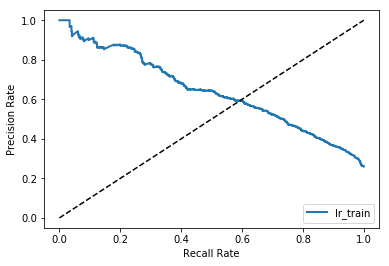

In [62]:
draw_pr(y_train,y_train_pro_lr[:,1],'lr_train')
plt.legend()
plt.show()

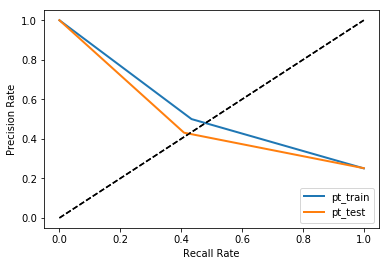

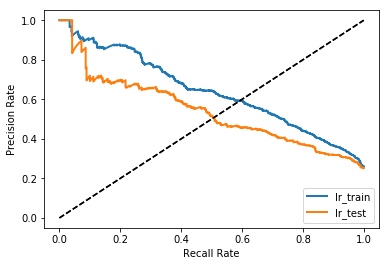

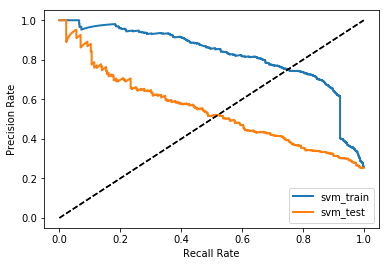

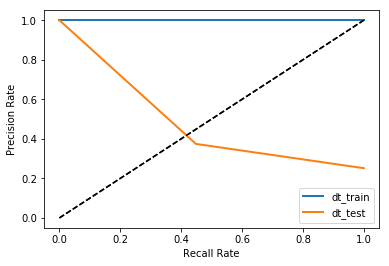

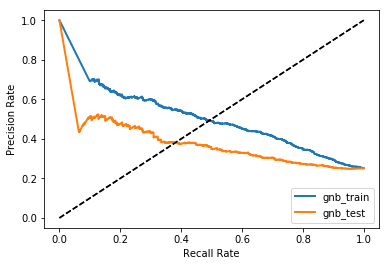

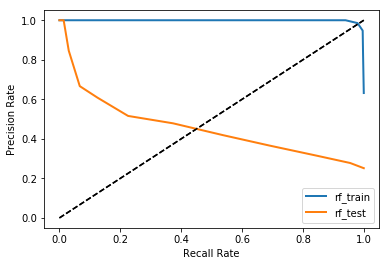

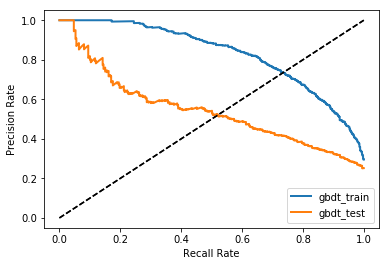

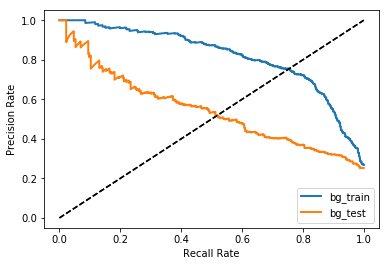

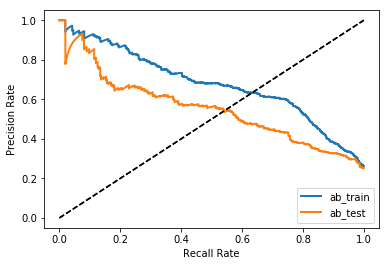

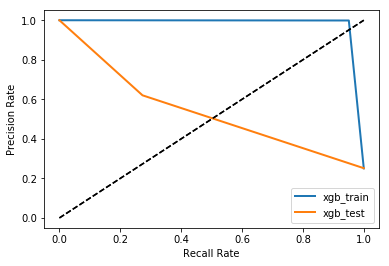

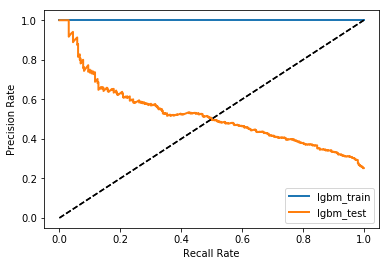

In [54]:

#感知机没有 概率 
draw_pr(y_train,y_train_pt,'pt_train')
draw_pr(y_test,y_test_pt,'pt_test')
plt.legend()
plt.show()


draw_pr(y_train,y_train_pro_lr[:,1],'lr_train')
draw_pr(y_test,y_test_pro_lr[:,1],'lr_test')
plt.legend()
plt.show()

draw_pr(y_train,y_train_pro_svm[:,1],'svm_train')
draw_pr(y_test,y_test_pro_svm[:,1],'svm_test')
plt.legend()
plt.show()

draw_pr(y_train,y_train_pro_dt[:,1],'dt_train')
draw_pr(y_test,y_test_pro_dt[:,1],'dt_test')
plt.legend()
plt.show()

draw_pr(y_train,y_train_pro_gnb[:,1],'gnb_train')
draw_pr(y_test,y_test_pro_gnb[:,1],'gnb_test')
plt.legend()
plt.show()

draw_pr(y_train,y_train_pro_rf[:,1],'rf_train')
draw_pr(y_test,y_test_pro_rf[:,1],'rf_test')
plt.legend()
plt.show()

draw_pr(y_train,y_train_pro_gbdt[:,1],'gbdt_train')
draw_pr(y_test,y_test_pro_gbdt[:,1],'gbdt_test')
plt.legend()
plt.show()

draw_pr(y_train,y_train_pro_bg[:,1],'bg_train')
draw_pr(y_test,y_test_pro_bg[:,1],'bg_test')
plt.legend()
plt.show()

draw_pr(y_train,y_train_pro_ab[:,1],'ab_train')
draw_pr(y_test,y_test_pro_ab[:,1],'ab_test')
plt.legend()
plt.show()

draw_pr(y_train,y_train_pro_xgb[:,1],'xgb_train')
draw_pr(y_test,y_test_pro_xgb[:,1],'xgb_test')
plt.legend()
plt.show()

draw_pr(y_train,y_train_pro_lgbm[:,1],'lgbm_train')
draw_pr(y_test,y_test_pro_lgbm[:,1],'lgbm_test')
plt.legend()
plt.show()